<a href="https://colab.research.google.com/github/sreyaraya/HelloGit/blob/main/dataDemoWorking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import auth
auth.authenticate_user()

In [9]:
!pip install mediapy
!pip install git+https://github.com/waymo-research/waymax.git@main#egg=waymo-waymax

  Cloning https://github.com/waymo-research/waymax.git (to revision main) to /tmp/pip-install-al6_4d05/waymo-waymax_2095a8444d2c4917b4a9e047385be73f
  Running command git clone --filter=blob:none --quiet https://github.com/waymo-research/waymax.git /tmp/pip-install-al6_4d05/waymo-waymax_2095a8444d2c4917b4a9e047385be73f
  Resolved https://github.com/waymo-research/waymax.git to commit 720f9214a9bf79b3da7926497f0cd0468ca3e630
  Preparing metadata (setup.py) ... done
  Created wheel for waymo-waymax: filename=waymo_waymax-0.1.0-py3-none-any.whl size=210891 sha256=ef75ffbe3b3cb6cc569a5d7ccc33bf426787fb212eca6f28b426fb373fd658cf
  Stored in directory: /tmp/pip-ephem-wheel-cache-d22l_bje/wheels/f8/13/c8/b03bdc1011ef34823a4b049a4b65aca4fe163a273327db83b6
Successfully built waymo-waymax


In [14]:
%%capture
import numpy as np
import mediapy
from tqdm import tqdm
import dataclasses

from waymax import config as _config
from waymax import dataloader
from waymax import datatypes
from waymax import visualization

In [17]:
scenarios = dataloader.simulator_state_generator(config.WOD_1_1_0_TRAINING)
scenario = next(scenarios)

config = dataclasses.replace(_config.WOD_1_1_0_TRAINING, max_num_objects=32)
data_iter = dataloader.simulator_state_generator(config=config)
scenario = next(data_iter)

""

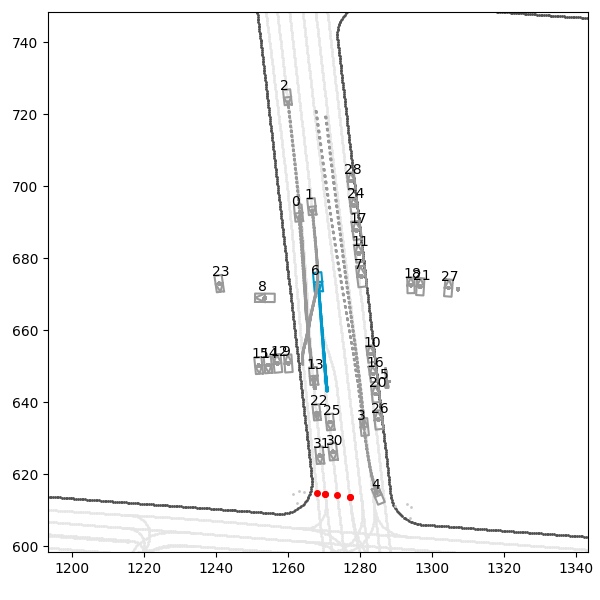

In [18]:
# Using logged trajectory
img = visualization.plot_simulator_state(scenario, use_log_traj=True)
mediapy.show_image(img)

In [19]:
imgs = []

state = scenario
for _ in range(scenario.remaining_timesteps):
  state = datatypes.update_state_by_log(state, num_steps=1)
  imgs.append(visualization.plot_simulator_state(state, use_log_traj=True))

mediapy.show_video(imgs, fps=10)